In [5]:
using LinearAlgebra
using Distributions
using DelimitedFiles
using BAT
using DataStructures
using CairoMakie
using DataFrames
using Interpolations
using CSV
using StatsBase

In [6]:
using Newtrinos

In [12]:
Revise.revise(Newtrinos)

┌ Warning: Replacing docs for `Newtrinos.find_mle :: Tuple{Any, Any, Any}` in module `Newtrinos`
└ @ Base.Docs docs/Docs.jl:243
┌ Warning: Replacing docs for `Newtrinos.profile :: NTuple{4, Any}` in module `Newtrinos`
└ @ Base.Docs docs/Docs.jl:243
┌ Warning: Replacing docs for `Newtrinos.scan :: NTuple{4, Any}` in module `Newtrinos`
└ @ Base.Docs docs/Docs.jl:243


true

In [2]:
const datadir = @__DIR__ 

"/mnt/c/Users/peller/work/Newtrinos/src/experiments/icecube/deepcore_3y_highstats_sample_b"

In [14]:
flux_splines = Newtrinos.deepcore.get_hkkm_flux(joinpath(datadir, "spl-nu-20-01-000.d"))

OrderedDict{Any, Any} with 4 entries:
  :numu    => 101×20 extrapolate(scale(interpolate(OffsetArray(::Matrix{Float32…
  :numubar => 101×20 extrapolate(scale(interpolate(OffsetArray(::Matrix{Float32…
  :nue     => 101×20 extrapolate(scale(interpolate(OffsetArray(::Matrix{Float32…
  :nuebar  => 101×20 extrapolate(scale(interpolate(OffsetArray(::Matrix{Float32…

In [15]:
# const L1 = 19.
# const R = 6378.2 + L1
# function cz_to_L(cz)
#     zen = acos.(cz)
#     phi = asin.((1-L1/R) * sin.(zen))
#     psi = zen .- phi
#     sqrt.((R-L1)^2 + R^2 .- (2*(R-L1) * R * cos.(psi)))
# end

In [16]:
const reco_energy_bin_edges = [5.623413,  7.498942, 10. , 13.335215, 17.782795, 23.713737, 31.622776, 42.16965 , 56.23413]
const reco_coszen_bin_edges = [-1., -0.75, -0.5 , -0.25,  0., 0.25, 0.5, 0.75, 1.]
const pid_bin_edges = -0.5:1:1.5
const type_bin_edges = [-0.5, 0.5, 3.5]

const cz_fine_bins = LinRange(-1,1, 201)
const log10e_fine_bins = LinRange(0,3,201)
const e_fine_bins = 10 .^log10e_fine_bins

const cz_fine = midpoints(cz_fine_bins);
const log10e_fine = midpoints(log10e_fine_bins);
const e_fine = 10 .^log10e_fine;

200-element Vector{Float64}:
   1.0174193661806048
   1.0531736871297162
   1.0901844923851276
   1.1284959375277617
   1.1681537298613247
   1.2092051829432084
   1.2516992730317251
   1.2956866975170194
   1.341219935405371
   1.3883533099290453
   1.4371430533563907
   1.487647374079502
   1.5399265260594919
   ⋮
 672.2023091115663
 695.8249547006042
 720.2777512383399
 745.5898720277816
 771.7915155850119
 798.9139416674041
 826.9895085679318
 856.0517117200949
 886.1352236594994
 917.2759353897785
 949.5109992021974
 982.8788730000315

In [19]:
layers = Newtrinos.earth_layers.compute_layers(cz_fine);

In [21]:
mc_nu = CSV.read(joinpath("neutrino_mc.csv"), DataFrame; header=true);
mc_nu.log10_true_energy = log10.(mc_nu.true_energy)
#mc_nu.l = cz_to_L(mc_nu.true_coszen);

795502-element SentinelArrays.ChainedVector{Float64, Vector{Float64}}:
 0.4948857718371854
 0.5559827373888268
 0.5375173684828458
 0.46723080072713863
 0.4769802395875874
 0.42685554668803893
 0.5646558598411734
 0.5704843479113852
 0.46452771357782974
 0.44337298749299625
 0.24275477862298403
 0.5883408552839795
 0.9798392837248509
 ⋮
 1.5641398533112256
 1.5968537456697678
 1.4881099500353998
 2.18848943425991
 1.5714458918087144
 1.495832037299826
 1.5202289007278706
 1.4873980384852858
 1.7633932014279188
 1.7460970955103532
 1.6112393706176045
 1.7068439012096845

In [22]:
function compute_indices(mc)
    mc.e_idx = searchsortedfirst.(Ref(reco_energy_bin_edges), mc.reco_energy) .- 1
    mc.c_idx = searchsortedfirst.(Ref(reco_coszen_bin_edges), mc.reco_coszen) .- 1
    mc.p_idx = searchsortedfirst.(Ref(pid_bin_edges), mc.pid) .- 1
    mc.t_idx = searchsortedfirst.(Ref(type_bin_edges), mc.type) .- 1
    mc.ef_idx = searchsortedfirst.(Ref(log10e_fine_bins), mc.log10_true_energy) .- 1
    mc.cf_idx = searchsortedfirst.(Ref(cz_fine_bins), mc.true_coszen) .- 1
end

compute_indices (generic function with 1 method)

In [23]:
compute_indices(mc_nu);

In [24]:
mc_nu

Row,pdg,pid,reco_coszen,reco_energy,true_coszen,true_energy,type,weight,log10_true_energy,e_idx,c_idx,p_idx,t_idx,ef_idx,cf_idx
,Int64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64
1,12,1,0.125,6.6,-0.166886,3.12526,3,1.95725e-10,0.494886,1,5,2,2,33,84
2,12,0,-0.625,6.6,0.0840211,3.59735,2,2.87952e-10,0.555983,1,2,1,2,38,109
3,12,0,-0.375,8.7,-0.0245363,3.4476,2,2.56374e-10,0.537517,2,3,1,2,36,98
4,12,0,-0.125,11.7,-0.684406,2.93245,1,1.63997e-10,0.467231,3,4,1,2,32,32
5,12,0,-0.625,8.7,0.0346757,2.99903,1,1.74413e-10,0.47698,2,2,1,2,32,104
6,12,0,-0.125,6.6,-0.230042,2.67212,3,1.27412e-10,0.426856,1,4,1,2,29,77
7,12,0,0.875,8.7,0.640466,3.66991,2,3.04719e-10,0.564656,2,8,1,2,38,165
8,12,1,0.125,6.6,-0.471117,3.7195,2,3.15472e-10,0.570484,1,5,2,2,39,53
9,12,0,0.125,8.7,-0.257905,2.91426,2,1.6145e-10,0.464528,2,5,1,2,31,75


In [25]:
function read_csv_into_hist(filename)
    csv = CSV.read(joinpath(datadir, filename), DataFrame; header=true)
    vars_to_extract = setdiff(names(csv), ("reco_coszen", "reco_energy", "pid"))
    d = OrderedDict()
    for var in vars_to_extract
        d[var] = fit(Histogram, (csv.reco_energy, csv.reco_coszen, csv.pid), weights(csv[:, var]), (reco_energy_bin_edges, reco_coszen_bin_edges, pid_bin_edges)).weights
    end
    d
end

read_csv_into_hist (generic function with 1 method)

In [26]:
muons = read_csv_into_hist("muons.csv")

OrderedDict{Any, Any} with 2 entries:
  "abs_uncert" => [1.21708 2.72346 … 1.52093 1.48547; 2.49286 3.4142 … 2.22315 …
  "count"      => [3.285 5.11 … 4.745 1.46; 4.015 5.84 … 9.855 4.745; … ; 4.015…

In [27]:
data = read_csv_into_hist("data.csv")

OrderedDict{Any, Any} with 1 entry:
  "count" => [254.0 418.0 … 100.0 31.0; 338.0 480.0 … 210.0 93.0; … ; 136.0 216…

In [28]:
const observed = data["count"]

8×8×2 Array{Float64, 3}:
[:, :, 1] =
 254.0  418.0  447.0  429.0  360.0  217.0  100.0   31.0
 338.0  480.0  623.0  600.0  531.0  380.0  210.0   93.0
 406.0  533.0  736.0  773.0  679.0  609.0  408.0  229.0
 395.0  550.0  668.0  778.0  728.0  669.0  533.0  366.0
 350.0  460.0  573.0  679.0  733.0  675.0  530.0  418.0
 239.0  302.0  430.0  498.0  560.0  538.0  429.0  307.0
 136.0  216.0  297.0  390.0  409.0  348.0  268.0  205.0
  98.0  150.0  197.0  239.0  252.0  215.0  177.0  112.0

[:, :, 2] =
 196.0  210.0  242.0  224.0  177.0   97.0   67.0   43.0
 176.0  171.0  247.0  206.0  197.0  136.0  103.0   66.0
 216.0  194.0  253.0  281.0  269.0  204.0  167.0  118.0
 177.0  208.0  262.0  336.0  374.0  299.0  202.0  175.0
 182.0  212.0  326.0  464.0  421.0  392.0  265.0  216.0
 133.0  217.0  342.0  496.0  454.0  360.0  267.0  177.0
 121.0  224.0  295.0  389.0  427.0  315.0  224.0  109.0
 129.0  192.0  242.0  313.0  281.0  226.0  139.0   58.0

In [29]:
hyperplanes = OrderedDict()
hyperplanes[:nuall_nc] = read_csv_into_hist("hyperplanes_all_nc.csv")
hyperplanes[:nue_cc] = read_csv_into_hist("hyperplanes_nue_cc.csv")
hyperplanes[:numu_cc] = read_csv_into_hist("hyperplanes_numu_cc.csv")
hyperplanes[:nutau_cc] = read_csv_into_hist("hyperplanes_nutau_cc.csv")

OrderedDict{Any, Any} with 6 entries:
  "ice_absorption"  => [0.00702571 0.00600796 … 0.0264721 0.0636833; 0.00237475…
  "ice_scattering"  => [-0.00573052 -0.00948726 … 0.0763472 0.0737333; -0.00940…
  "offset"          => [1.22676 1.42121 … -0.303146 9.03346; 1.3819 0.811742 … …
  "opt_eff_headon"  => [0.0301673 0.0347025 … 0.0877502 0.175533; 0.0309333 0.0…
  "opt_eff_lateral" => [-0.00700613 -0.00331234 … 0.002499 -0.0111869; -0.00568…
  "opt_eff_overall" => [-0.0477133 -0.25693 … 1.41498 -8.28126; -0.218251 0.313…

In [31]:
mc = OrderedDict()

OrderedDict{Any, Any}()

In [32]:
mc[:nue] = mc_nu[mc_nu.pdg .== 12, :]
mc[:nuebar] = mc_nu[mc_nu.pdg .== -12, :]
mc[:numu] = mc_nu[mc_nu.pdg .== 14, :]
mc[:numubar] = mc_nu[mc_nu.pdg .== -14, :]
mc[:nutau] = mc_nu[mc_nu.pdg .== 16, :]
mc[:nutaubar] = mc_nu[mc_nu.pdg .== -16, :]

Row,pdg,pid,reco_coszen,reco_energy,true_coszen,true_energy,type,weight,log10_true_energy,e_idx,c_idx,p_idx,t_idx,ef_idx,cf_idx
,Int64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64
1,-16,0,0.625,8.7,0.850807,8.84088,2,2.92615e-9,0.946496,2,7,1,2,64,186
2,-16,0,0.375,11.7,0.539387,7.90468,1,2.11229e-9,0.897885,3,6,1,2,60,154
3,-16,0,-0.625,8.7,-0.112069,9.71287,2,3.81281e-9,0.987348,2,2,1,2,66,89
4,-16,0,-0.625,15.6,-0.303866,8.74344,3,2.83453e-9,0.941682,4,2,1,2,63,70
5,-16,0,0.125,6.6,0.550843,8.35092,2,2.48356e-9,0.921734,1,5,1,2,62,156
6,-16,1,-0.625,8.7,-0.995494,9.3353,3,3.39872e-9,0.970128,2,2,2,2,65,1
7,-16,0,-0.625,6.6,-0.761305,6.21679,2,1.04623e-9,0.793566,1,2,1,2,53,24
8,-16,0,-0.375,6.6,-0.143835,9.11394,2,3.1859e-9,0.959706,1,3,1,2,64,86
9,-16,0,-0.375,8.7,-0.729606,6.09981,1,9.82851e-10,0.785317,2,3,1,2,53,28


In [33]:
channels = collect(keys(mc))

6-element Vector{Any}:
 :nue
 :nuebar
 :numu
 :numubar
 :nutau
 :nutaubar

In [34]:
function LogLogParam(true_energy, y1, y2, x1, x2, use_cutoff, cutoff_value)
    """ From https://github.com/icecube/pisa/blob/master/pisa/utils/barr_parameterization.py """
    nu_nubar = sign(y2)
    y1 = sign(y1) * log10(abs(y1) + 0.0001)
    y2 = log10(abs(y2 + 0.0001))
    modification = nu_nubar * 10. ^(((y2 - y1) / (x2 - x1)) * (log10(true_energy) - x1) + y1 - 2.)
    if use_cutoff
        modification *= exp(-1. * true_energy / cutoff_value)
    end
    return modification
end


function norm_fcn(x, sigma)
    """ From https://github.com/icecube/pisa/blob/master/pisa/utils/barr_parameterization.py """
    return 1. / sqrt(2 * pi * sigma^2) * exp(-x^2 / (2 * sigma^2))
end

norm_fcn (generic function with 1 method)

In [35]:
flavs = [:nue, :numu, :nutau]

3-element Vector{Symbol}:
 :nue
 :numu
 :nutau

In [36]:
flux = OrderedDict()

OrderedDict{Any, Any}()

In [37]:
e = ones(size(cz_fine))' .* e_fine;
log10e = ones(size(cz_fine))' .* log10e_fine;
cz = cz_fine' .* ones(size(e_fine));

In [38]:
for key in [:nue, :numu]
    for anti in ["", "bar"]
        fkey = Symbol(key, anti)
            flux[fkey] = DataFrame(true_energy=[(e...)...], log10_true_energy=[(log10e...)...], true_coszen=[(cz...)...])
            flux[fkey][!, :flux] = flux_splines[fkey].(flux[fkey].log10_true_energy, flux[fkey].true_coszen);
            if key == :nue
                flux[fkey][!, "Barr_Ave"] = LogLogParam.(flux[fkey].true_energy, 5.5, 53., 0.5, 3., false, 0.)
                flux[fkey][!, "Barr_LogLog"] = LogLogParam.(flux[fkey].true_energy, 0.9, 10., 0.5, 2, true, 650.)
                flux[fkey][!, "Barr_norm_fcn"] = norm_fcn.(flux[fkey].true_coszen, 0.36)
            else
                flux[fkey][!, "Barr_Ave"] = LogLogParam.(flux[fkey].true_energy, 3, 43, 0.5, 3., false, 0.)
                flux[fkey][!, "Barr_LogLog"] = LogLogParam.(flux[fkey].true_energy, 0.6, 5, 0.5, 2., true, 1000.)
                flux[fkey][!, "Barr_norm_fcn"] = norm_fcn.(flux[fkey].true_coszen, 0.36)
            end
    end
end

In [39]:
# for ch in channels
#     for key in [:nue, :numu]
#         for anti in ["", "bar"]
#             fkey = Symbol(key, anti)
#             mc[ch][!, "flux_" * String(fkey)] = flux[fkey].(mc[ch].log10_true_energy, mc[ch].true_coszen);
#         end
#     end
# end

In [40]:
# for anti in ["", "bar"]
#     for flav in flavs
#         flav = Symbol(flav, anti)
#         for key in [:nue, :numu]
#             fkey = Symbol(key, anti)
#             mc[flav][!, "flux_" * String(key)] = flux[fkey].(mc[flav].log10_true_energy, mc[flav].true_coszen);
#             # precompute Barr stuff 
#             if key == :nue
#                 mc[flav][!, "Barr_Ave_" * String(key)] = LogLogParam.(mc[flav].true_energy, 5.5, 53., 0.5, 3., false, 0.)
#                 mc[flav][!, "Barr_LogLog_" * String(key)] = LogLogParam.(mc[flav].true_energy, 0.9, 10., 0.5, 2, true, 650.)
#             else
#                 mc[flav][!, "Barr_Ave_" * String(key)] = LogLogParam.(mc[flav].true_energy, 3, 43, 0.5, 3., false, 0.)
#                 mc[flav][!, "Barr_LogLog_" * String(key)] = LogLogParam.(mc[flav].true_energy, 0.6, 5, 0.5, 2., true, 1000.)
#                 mc[flav][!, "Barr_norm_fcn"] = norm_fcn.(mc[flav].true_coszen, 0.36)
#             end
#         end
#     end
# end

In [41]:
mc[:nue]

Row,pdg,pid,reco_coszen,reco_energy,true_coszen,true_energy,type,weight,log10_true_energy,e_idx,c_idx,p_idx,t_idx,ef_idx,cf_idx
,Int64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64
1,12,1,0.125,6.6,-0.166886,3.12526,3,1.95725e-10,0.494886,1,5,2,2,33,84
2,12,0,-0.625,6.6,0.0840211,3.59735,2,2.87952e-10,0.555983,1,2,1,2,38,109
3,12,0,-0.375,8.7,-0.0245363,3.4476,2,2.56374e-10,0.537517,2,3,1,2,36,98
4,12,0,-0.125,11.7,-0.684406,2.93245,1,1.63997e-10,0.467231,3,4,1,2,32,32
5,12,0,-0.625,8.7,0.0346757,2.99903,1,1.74413e-10,0.47698,2,2,1,2,32,104
6,12,0,-0.125,6.6,-0.230042,2.67212,3,1.27412e-10,0.426856,1,4,1,2,29,77
7,12,0,0.875,8.7,0.640466,3.66991,2,3.04719e-10,0.564656,2,8,1,2,38,165
8,12,1,0.125,6.6,-0.471117,3.7195,2,3.15472e-10,0.570484,1,5,2,2,39,53
9,12,0,0.125,8.7,-0.257905,2.91426,2,1.6145e-10,0.464528,2,5,1,2,31,75


In [42]:
flux[:nue]

Row,true_energy,log10_true_energy,true_coszen,flux,Barr_Ave,Barr_LogLog,Barr_norm_fcn
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.01742,0.0075,-0.995,71.2319,0.0351999,0.00407632,0.024311
2,1.05317,0.0225,-0.995,64.4534,0.0356816,0.00417543,0.024311
3,1.09018,0.0375,-0.995,58.2628,0.03617,0.00427695,0.024311
4,1.1285,0.0525,-0.995,52.6543,0.036665,0.00438092,0.024311
5,1.16815,0.0675,-0.995,47.6058,0.0371668,0.00448741,0.024311
6,1.20921,0.0825,-0.995,43.0537,0.0376754,0.00459649,0.024311
7,1.2517,0.0975,-0.995,38.9286,0.0381911,0.0047082,0.024311
8,1.29569,0.1125,-0.995,35.1654,0.0387137,0.00482261,0.024311
9,1.34122,0.1275,-0.995,31.7302,0.0392436,0.0049398,0.024311


## ...data is now prepared...

In [43]:
# function reweight(mc, params, osc_prob)

#     p_nu = osc_prob(e_fine, l_fine, params);
#     p_nubar = osc_prob(e_fine, l_fine, params, anti=true);


#     osc_flux = OrderedDict()
    
#     for i in 1:3
#         flav = flavs[i]
#         p_nue_interp = linear_interpolation((log10e_fine, cz_fine), p_nu[:,:,1,i], extrapolation_bc = Flat());
#         p_numu_interp = linear_interpolation((log10e_fine, cz_fine), p_nu[:,:,2,i], extrapolation_bc = Flat());
    
#         p_nue = p_nue_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
#         p_numu = p_numu_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
    
#         osc_flux[flav] = p_nue .* mc[flav].flux_nue .+ p_numu .* mc[flav].flux_numu
#     end
    
#     for i in 1:3
#         flav = Symbol(flavs[i], "bar")
#         p_nue_interp = linear_interpolation((log10e_fine, cz_fine), p_nubar[:,:,1,i], extrapolation_bc = Flat());
#         p_numu_interp = linear_interpolation((log10e_fine, cz_fine), p_nubar[:,:,2,i], extrapolation_bc = Flat());
    
#         p_nue = p_nue_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
#         p_numu = p_numu_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
    
#         osc_flux[flav] = p_nue .* mc[flav].flux_nuebar .+ p_numu .* mc[flav].flux_numubar
#     end

#     osc_flux
# end

# Analysis

In [44]:
params_dict = OrderedDict()
params_dict[:deepcore_lifetime] = 2.5
params_dict[:deepcore_atm_muon_scale] = 1.
params_dict[:deepcore_ice_absorption] = 1.
params_dict[:deepcore_ice_scattering] = 1.
params_dict[:deepcore_opt_eff_overall] = 1.
params_dict[:deepcore_opt_eff_lateral] = 0.
params_dict[:deepcore_opt_eff_headon] = 0.
params_dict[:nc_norm] = 1.
params_dict[:nutau_cc_norm] = 1.
params_dict[:atm_flux_nunubar_ratio] = 1.
params_dict[:atm_flux_nueumu_ratio] = 1.
params_dict[:atm_flux_spectral_index] = 0.
params_dict[:Barr_uphor_ratio] = 0.0
params_dict[:Barr_nu_nubar_ratio ] = 0.

0.0

In [45]:
priors = OrderedDict()
priors[:deepcore_lifetime] = Uniform(2, 4)
priors[:deepcore_atm_muon_scale ] = Uniform(0, 2)
priors[:deepcore_ice_absorption] = Truncated(Normal(1, 0.1), 0.85, 1.15)
priors[:deepcore_ice_scattering] = Truncated(Normal(1, 0.1), 0.85, 1.15)
priors[:deepcore_opt_eff_overall] = Truncated(Normal(1, 0.1), 0.8, 1.2)
priors[:deepcore_opt_eff_lateral] = Truncated(Normal(0, 1.), -2, 2)
priors[:deepcore_opt_eff_headon] = Uniform(-5, 2.)
priors[:nc_norm] = Truncated(Normal(1, 0.2), 0.4, 1.6)
priors[:nutau_cc_norm] = Uniform(0., 2.)
priors[:atm_flux_nunubar_ratio] = 1.
priors[:atm_flux_nueumu_ratio] = Truncated(Normal(1., 0.05), 0.85, 1.15)
priors[:atm_flux_spectral_index] = Truncated(Normal(0., 0.1), -0.3, 0.3)
priors[:Barr_uphor_ratio] = Truncated(Normal(0., 1.), -3, 3)
priors[:Barr_nu_nubar_ratio] = Truncated(Normal(0., 1.), -3, 3)

Truncated(Normal{Float64}(μ=0.0, σ=1.0); lower=-3.0, upper=3.0)

In [46]:
using BenchmarkTools, ForwardDiff

In [47]:
p = NamedTuple(merge(Newtrinos.osc.standard.params, params_dict))

osc_prob = Newtrinos.osc.standard.osc_prob

osc_prob (generic function with 2 methods)

# ToDo
- PREM / matter osc

In [48]:
function make_hist(e_idx, c_idx, p_idx, t_idx, w, size=(8,8,2,2))
    hist = similar(w, size)
    for i in 1:prod(size)
        hist[i] = 0.
    end
    for i in 1:length(w)
        hist[e_idx[i], c_idx[i], p_idx[i], t_idx[i]] += w[i]
    end
    hist
end

make_hist (generic function with 2 methods)

In [49]:
function make_hist_per_channel(mc, osc_flux, lifetime_seconds)
    w = lifetime_seconds * mc.weight .* osc_flux
    make_hist(mc.e_idx, mc.c_idx, mc.p_idx, mc.t_idx, w)
end

make_hist_per_channel (generic function with 1 method)

## Flux

In [50]:
function scale_flux(A::AbstractVector, B::AbstractVector, scale::Real)
    r = A ./ B
    total = A .+ B
    mod_B = total ./ (1 .+ r .* scale)
    mod_A = r .* scale .* mod_B
    return mod_A, mod_B  # Returns two separate vectors instead of tuples
end

scale_flux (generic function with 1 method)

In [51]:
function Barr_factor_nue(Barr_Ave, Barr_LogLog, Barr_norm_fcn, nubar_sys, uphor)
    """ From https://github.com/icecube/pisa/blob/master/pisa/utils/barr_parameterization.py """
    # These parameters are obtained from fits to the paper of Barr
    # E dependent ratios, max differences per flavor (Fig.7)
    
    r_uphor = 1. .- 0.3 .* uphor .* Barr_LogLog .* Barr_norm_fcn
    r = Barr_Ave .- (1.5 .* Barr_norm_fcn .- 0.7) .* Barr_LogLog
    modfactor = nubar_sys .* r

    # nue, nuebar:
    return max.(0., 1. .+ 0.5 .* modfactor) .* r_uphor, max.(0., 1. ./ (1 .+ 0.5 .* modfactor)) .* r_uphor
        
    
end

function Barr_factor_numu(Barr_Ave, Barr_LogLog, Barr_norm_fcn, nubar_sys, uphor)
    """ From https://github.com/icecube/pisa/blob/master/pisa/utils/barr_parameterization.py """
    # These parameters are obtained from fits to the paper of Barr
    # E dependent ratios, max differences per flavor (Fig.7)

    r = Barr_Ave .- (Barr_norm_fcn .- 0.6) .* 2.5 .* Barr_LogLog
    modfactor = nubar_sys .* r

    # numu, numubar:
    max.(0., 1. .+ 0.5 .* modfactor), max.(0., 1. ./ (1 .+ 0.5 .* modfactor))
    
end

Barr_factor_numu (generic function with 1 method)

In [52]:
function calc_sys_flux(flux, params)

    # nu-nubar ratio:
    flux_nue1, flux_nuebar1 = scale_flux(flux[:nue].flux, flux[:nuebar].flux, params.atm_flux_nunubar_ratio)
    flux_numu1, flux_numubar1 = scale_flux(flux[:numu].flux, flux[:numubar].flux, params.atm_flux_nunubar_ratio)
    
    # nue-numu ratio:
    flux_nue2, flux_numu2 = scale_flux(flux_nue1, flux_numu1, params.atm_flux_nueumu_ratio)
    flux_nuebar2, flux_numubar2 = scale_flux(flux_nuebar1, flux_numubar1, params.atm_flux_nueumu_ratio)

    # spectral
    f_spectral_shift = (flux[:nue].true_energy ./ 24.0900951261) .^ params.atm_flux_spectral_index

    # Barr modifiers
    f_Barr_nue, f_Barr_nuebar = Barr_factor_nue(flux[:nue].Barr_Ave, flux[:nue].Barr_LogLog, flux[:nue].Barr_norm_fcn, params.Barr_nu_nubar_ratio, params.Barr_uphor_ratio)
    f_Barr_numu, f_Barr_numubarr = Barr_factor_nue(flux[:numu].Barr_Ave, flux[:numu].Barr_LogLog, flux[:numu].Barr_norm_fcn, params.Barr_nu_nubar_ratio, params.Barr_uphor_ratio)

    # apply:
    f_nue3 = flux_nue2 .* f_spectral_shift .* f_Barr_nue
    f_nuebar3 = flux_nuebar2 .* f_spectral_shift .* f_Barr_nuebar
    f_numu3 = flux_numu2 .* f_spectral_shift .* f_Barr_numu
    f_numubar3 = flux_numubar2 .* f_spectral_shift .* f_Barr_numubarr

    s = (size(e_fine)[1], size(cz_fine)[1])

    
    return (reshape(f_nue3, s), reshape(f_numu3, s)), (reshape(f_nuebar3, s), reshape(f_numubar3, s)) 
end

calc_sys_flux (generic function with 1 method)

In [53]:
@benchmark calc_sys_flux(flux, p)

BenchmarkTools.Trial: 3556 samples with 1 evaluation per sample.
 Range (min … max):  923.761 μs …  13.771 ms  ┊ GC (min … max):  0.00% … 82.01%
 Time  (median):       1.117 ms               ┊ GC (median):     0.00%
 Time  (mean ± σ):     1.392 ms ± 719.989 μs  ┊ GC (mean ± σ):  17.08% ± 20.12%

   ▄▆██▇▆▅▄▃▂▁▁                                  ▂▂▂▂▃▂▂▁▁      ▂
  ██████████████▆▇▆▅▁▃▄▃▃▃▁▁▄▁▁▁▁▁▁▁▁▁▄▁▁▃▃▅▅▇▇███████████▇█▇▇▇ █
  924 μs        Histogram: log(frequency) by time       3.34 ms <

 Memory estimate: 9.46 MiB, allocs estimate: 129.

In [94]:
# flux_nue_anti = scale_flux(mc.flux_nue, mc.flux_nuebar, params.atm_flux_nunubar_ratio)[Int(anti)+1]
# flux_numu_anti = scale_flux(mc.flux_numu, mc.flux_numubar, params.atm_flux_nunubar_ratio)[Int(anti)+1]

# # nue-numu ratio:
# flux_nue_i, flux_numu_i = scale_flux(flux_nue_anti, flux_numu_anti, params.atm_flux_nueumu_ratio)

# # spectral index
# f = (mc.true_energy ./ 24.0900951261) .^ params.atm_flux_spectral_index

# Barr_nue, Barr_numu = ModFlux(mc.Barr_Ave_nue, mc.Barr_Ave_numu, mc.Barr_LogLog_nue, mc.Barr_LogLog_numu, mc.Barr_norm_fcn, anti, params.Barr_nu_nubar_ratio, params.Barr_uphor_ratio)

# flux_nue_i * f * Barr_nue, flux_numu_i * f * Barr_numu

In [95]:
# function calc_sysflux_kernel(mc, params, anti)
#     # nu-nubar ratio
#     flux_nue_anti = scale_flux(mc.flux_nue, mc.flux_nuebar, params.atm_flux_nunubar_ratio)[Int(anti)+1]
#     flux_numu_anti = scale_flux(mc.flux_numu, mc.flux_numubar, params.atm_flux_nunubar_ratio)[Int(anti)+1]
    
#     # nue-numu ratio:
#     flux_nue_i, flux_numu_i = scale_flux(flux_nue_anti, flux_numu_anti, params.atm_flux_nueumu_ratio)
    
#     # spectral index
#     f = (mc.true_energy ./ 24.0900951261) .^ params.atm_flux_spectral_index

#     Barr_nue, Barr_numu = ModFlux(mc.Barr_Ave_nue, mc.Barr_Ave_numu, mc.Barr_LogLog_nue, mc.Barr_LogLog_numu, mc.Barr_norm_fcn, anti, params.Barr_nu_nubar_ratio, params.Barr_uphor_ratio)

#     flux_nue_i * f * Barr_nue, flux_numu_i * f * Barr_numu
# end

In [96]:
# function calc_sysflux_kernel_2(flux_nue, flux_nuebar, flux_numu, flux_numubar, true_energy, Barr_Ave_nue, Barr_Ave_numu, Barr_LogLog_nue, Barr_LogLog_numu, Barr_norm_fcn, params, anti)
#     # nu-nubar ratio
#     flux_nue_anti = scale_flux(flux_nue, flux_nuebar, params.atm_flux_nunubar_ratio)[Int(anti)+1]
#     flux_numu_anti = scale_flux(flux_numu, flux_numubar, params.atm_flux_nunubar_ratio)[Int(anti)+1]
    
#     # nue-numu ratio:
#     flux_nue_i, flux_numu_i = scale_flux(flux_nue_anti, flux_numu_anti, params.atm_flux_nueumu_ratio)
    
#     # spectral index
#     f = (true_energy ./ 24.0900951261) .^ params.atm_flux_spectral_index

#     Barr_nue, Barr_numu = ModFlux(Barr_Ave_nue, Barr_Ave_numu, Barr_LogLog_nue, Barr_LogLog_numu, Barr_norm_fcn, anti, params.Barr_nu_nubar_ratio, params.Barr_uphor_ratio)

#     flux_nue_i * f * Barr_nue, flux_numu_i * f * Barr_numu
# end

In [97]:
# function calc_sys_flux(mc, params, anti=false)
#     flux = stack([calc_sysflux_kernel(m, params, anti) for m in Tables.namedtupleiterator(mc)])
#     flux[1, :], flux[2, :]
# end

In [98]:
# function calc_sys_flux(mc, params, anti=false)
#     flux = stack(calc_sysflux_kernel_2.(mc.flux_nue, mc.flux_nuebar, mc.flux_numu, mc.flux_numubar, mc.true_energy, mc.Barr_Ave_nue, mc.Barr_Ave_numu, mc.Barr_LogLog_nue, mc.Barr_LogLog_numu, mc.Barr_norm_fcn, Ref(params), anti))
#     flux[1, :], flux[2, :]
# end

## Flux done

In [57]:
# function reweight_per_channel(p, mc, sys_flux_nue, sys_flux_numu, out)
#     pmce = [p[ef_idx, cf_idx, 1, out] for (ef_idx, cf_idx) in zip(mc.ef_idx, mc.cf_idx)]
#     pmcmu = [p[ef_idx, cf_idx, 2, out] for (ef_idx, cf_idx) in zip(mc.ef_idx, mc.cf_idx)]
#     return pmce .* sys_flux_nue .+ pmcmu .* sys_flux_numu   
# end

reweight_per_channel (generic function with 1 method)

In [58]:
# function reweight(mc, params, osc_prob)
#     p = [osc_prob(e_fine, l_fine, params), osc_prob(e_fine, l_fine, params, anti=true)]
#     res = OrderedDict()
#     for i in 1:length(channels)
#         anti = Bool((i+1)%2)
#         sys_flux_nue, sys_flux_numu = calc_sys_flux(mc[channels[i]], params, anti)
#         res[channels[i]] = reweight_per_channel(p[Int(anti)+1], mc[channels[i]], sys_flux_nue, sys_flux_numu, Int(ceil(i/2)))
#     end
#     res
# end

reweight (generic function with 1 method)

In [54]:
flavs

3-element Vector{Symbol}:
 :nue
 :numu
 :nutau

In [55]:
flux

OrderedDict{Any, Any} with 4 entries:
  :nue     => 40000×7 DataFrame…
  :nuebar  => 40000×7 DataFrame…
  :numu    => 40000×7 DataFrame…
  :numubar => 40000×7 DataFrame…

In [56]:
function reweight(mc, params, osc_prob)
    p = [osc_prob(e_fine, layers, params), osc_prob(e_fine, layers, params, anti=true)]
    f = calc_sys_flux(flux, params)
    res = OrderedDict()    
    for (i, flav) in enumerate(flavs)
        for (j, anti) in enumerate(["", "bar"])
            osc_flux = f[j][1] .* p[j][:, :, 1, i] .+ f[j][2] .* p[j][:, :, 2, i]
            ch = Symbol(flav, anti)
            res[ch] = [osc_flux[ef_idx, cf_idx] for (ef_idx, cf_idx) in zip(mc[ch].ef_idx, mc[ch].cf_idx)]
        end
    end
    res
end

reweight (generic function with 1 method)

In [58]:
@time reweight(mc, p, osc_prob)

  0.823187 seconds (6.10 M allocations: 1.009 GiB, 17.97% gc time)


OrderedDict{Any, Any} with 6 entries:
  :nue      => [5.68838, 4.01405, 5.08615, 3.22628, 7.32693, 8.00546, 1.73146, …
  :nuebar   => [2.57399, 2.19127, 3.74457, 1.56448, 2.69741, 2.86227, 9.66515, …
  :numu     => [3.38214, 8.37526, 5.41986, 3.56768, 2.949, 0.35089, 2.28079, 1.…
  :numubar  => [3.7205, 0.0738849, 4.12272, 12.0884, 0.165533, 5.40064, 1.8315,…
  :nutau    => [0.436631, 0.0188555, 0.128972, 0.457814, 0.000679963, 0.0939325…
  :nutaubar => [1.97153e-5, 0.000118215, 0.0998114, 0.423017, 7.67768e-5, 0.164…

In [59]:
function get_hyperplane_factor(hyperplane, params)
    f = (
        hyperplane["offset"] .+ 
        (hyperplane["ice_absorption"] * 100*(params.deepcore_ice_absorption -1)) .+ 
        (hyperplane["ice_scattering"] * 100*(params.deepcore_ice_scattering -1)) .+
        (hyperplane["opt_eff_overall"] .* params.deepcore_opt_eff_overall) .+
        (hyperplane["opt_eff_lateral"] * ((params.deepcore_opt_eff_lateral*10) +25.)) .+
        (hyperplane["opt_eff_headon"] * params.deepcore_opt_eff_headon)
        )
end

get_hyperplane_factor (generic function with 1 method)

In [60]:
hyperplanes

OrderedDict{Any, Any} with 4 entries:
  :nuall_nc => OrderedDict{Any, Any}("ice_absorption"=>[-0.000668132 -0.0040543…
  :nue_cc   => OrderedDict{Any, Any}("ice_absorption"=>[-0.00233225 0.000678494…
  :numu_cc  => OrderedDict{Any, Any}("ice_absorption"=>[-0.000787482 0.00030738…
  :nutau_cc => OrderedDict{Any, Any}("ice_absorption"=>[0.00702571 0.00600796 ……

In [61]:
function apply_hyperplanes(hists, params)
    sum = zeros(eltype(first(hists)[2]), size(first(hists)[2])[1:3])
    f_nc = get_hyperplane_factor(hyperplanes[:nuall_nc], params)
    for ch in channels
        if startswith(String(ch), "nue")
            f_cc = get_hyperplane_factor(hyperplanes[:nue_cc], params)
        elseif startswith(String(ch), "numu")
            f_cc = get_hyperplane_factor(hyperplanes[:numu_cc], params)
        else
            f_cc = get_hyperplane_factor(hyperplanes[:nutau_cc], params) .* params.nutau_cc_norm
        end        
        sum .+= hists[ch][:, :, :, 1] .* f_nc .* params.nc_norm
        sum .+= hists[ch][:, :, :, 2] .* f_cc
    end
    sum
end     

apply_hyperplanes (generic function with 1 method)

In [62]:
function get_expected(params, osc_prob)

    osc_flux = reweight(mc, params, osc_prob)

    lifetime_seconds = params.deepcore_lifetime * 365 * 24 * 3600

    hists = OrderedDict()

    for ch in channels
        hists[ch] = make_hist_per_channel(mc[ch], osc_flux[ch], lifetime_seconds)
    end
    
    expected_nu = apply_hyperplanes(hists, params)
    
    expected = (expected_nu .+ params.deepcore_atm_muon_scale .* muons["count"])
end

get_expected (generic function with 1 method)

In [64]:
@time get_expected(p, osc_prob)

  0.827848 seconds (6.10 M allocations: 1.021 GiB, 18.85% gc time)


8×8×2 Array{Float64, 3}:
[:, :, 1] =
 288.436  421.89   494.27   459.265  350.63   210.406   97.3112   30.8766
 363.668  511.078  618.017  608.788  518.81   367.385  221.021    94.2289
 425.333  575.106  702.665  731.099  693.869  562.177  402.119   233.378
 421.189  553.3    671.211  747.415  743.121  653.259  520.192   364.841
 352.592  463.274  580.149  671.718  677.042  610.824  512.32    387.265
 253.393  335.157  429.057  507.062  533.987  478.736  399.432   317.794
 172.525  226.868  292.063  355.713  366.416  325.503  270.467   210.738
 114.859  150.218  187.789  233.885  241.332  206.397  160.313   130.107

[:, :, 2] =
 196.377  224.233  255.934  238.813  179.311  113.521   67.2637   33.4134
 211.529  205.211  239.398  237.764  196.085  142.833  100.991    84.8471
 233.126  221.907  262.695  290.66   269.001  210.069  161.515   143.878
 232.138  227.546  294.916  355.751  349.955  289.955  229.094   193.311
 194.252  236.372  346.384  451.875  438.283  354.926  281.825   214.9

In [65]:
function forward_model(osc_prob)
    model = params -> begin
        exp_events = get_expected(params, osc_prob)
        distprod(Poisson.(exp_events))
    end
end

forward_model (generic function with 1 method)

# Testing

In [66]:
fwd_mod = forward_model(osc_prob)

#3 (generic function with 1 method)

In [67]:
@time logpdf(fwd_mod(p), data["count"])

  1.024566 seconds (6.75 M allocations: 1.053 GiB, 13.59% gc time, 21.90% compilation time)


-580.2382596721355

In [68]:
using DensityInterface

In [69]:
llh = let osc_prob = osc_prob, observed = observed
        params -> logpdf(forward_model(osc_prob)(params), observed)
end

l = logfuncdensity(params -> llh(params))

LogFuncDensity(var"#7#8"())

In [70]:
@time logdensityof(l, p)

  0.854144 seconds (6.32 M allocations: 1.031 GiB, 18.02% gc time, 5.11% compilation time)


-580.2382596721355

In [71]:
using ForwardDiff

In [72]:
g(p) = ForwardDiff.gradient(p -> logdensityof(l, p), p)

g (generic function with 1 method)

In [73]:
@benchmark logdensityof(l, p)

BenchmarkTools.Trial: 7 samples with 1 evaluation per sample.
 Range (min … max):  787.333 ms … 932.828 ms  ┊ GC (min … max): 15.37% … 13.46%
 Time  (median):     795.582 ms               ┊ GC (median):    15.49%
 Time  (mean ± σ):   814.039 ms ±  52.579 ms  ┊ GC (mean ± σ):  15.21% ±  0.81%

  ▁▁▁█  ▁                                                     ▁  
  ████▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  787 ms           Histogram: frequency by time          933 ms <

 Memory estimate: 1.02 GiB, allocs estimate: 6100755.

In [74]:
@benchmark g(p)

BenchmarkTools.Trial: 1 sample with 1 evaluation per sample.
 Single result which took 5.498 s (27.11% GC) to evaluate,
 with a memory estimate of 8.61 GiB, over 15856162 allocations.

In [87]:
using BAT
using Optim

- ice_absorption : slope accounting for differences in ice optical absorption, nominal parameter values is 1, the uncertainty +/- 0.1 and the valid range +/- 0.15
- ice_scattering : slope accounting for differences in ice optical scattering, nominal parameter values is 1, the uncertainty +/- 0.1 and the valid range +/- 0.15
- opt_eff_overall : slope accounting for overall optical efficiency of DOMs, nominal parameter value is 1, the uncertainty +/- 0.1 and the valid range is +/- 0.2
- opt_eff_lateral : slope accounting for lateral optical efficiency of DOMs, nominal parameter value is 0, the uncertainty +/- 1 and the valid range is +/- 2
- opt_eff_headon : slope accounting for head-on optical efficiency of DOMs, nominal parameter value is 0, the uncertainty unknown (flat) and the valid range is [-5.0, +2.0]


In [89]:
prior_d = merge(Newtrinos.osc.standard.priors, priors)

OrderedDict{Any, Any} with 20 entries:
  :θ₁₂                      => Uniform{Float64}(a=0.420534, b=0.785398)
  :θ₁₃                      => Uniform{Float64}(a=0.1, b=0.2)
  :θ₂₃                      => Uniform{Float64}(a=0.523599, b=1.0472)
  :δCP                      => Uniform{Float64}(a=0.0, b=6.28319)
  :Δm²₂₁                    => Uniform{Float64}(a=6.5e-5, b=9.0e-5)
  :Δm²₃₁                    => Uniform{Float64}(a=0.002, b=0.003)
  :deepcore_lifetime        => Uniform{Float64}(a=2.0, b=4.0)
  :deepcore_atm_muon_scale  => Uniform{Float64}(a=0.0, b=2.0)
  :deepcore_ice_absorption  => Truncated(Normal{Float64}(μ=1.0, σ=0.1); lower=0…
  :deepcore_ice_scattering  => Truncated(Normal{Float64}(μ=1.0, σ=0.1); lower=0…
  :deepcore_opt_eff_overall => Truncated(Normal{Float64}(μ=1.0, σ=0.1); lower=0…
  :deepcore_opt_eff_lateral => Truncated(Normal{Float64}(μ=0.0, σ=1.0); lower=-…
  :deepcore_opt_eff_headon  => Uniform{Float64}(a=-5.0, b=2.0)
  :nc_norm                  => Truncated(Norma

In [90]:
prior = distprod(;prior_d...)

NamedTupleDist((θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), deepcore_lifetime = Uniform{Float64}(a=2.0, b=4.0), deepcore_atm_muon_scale = Uniform{Float64}(a=0.0, b=2.0), deepcore_ice_absorption = Truncated(Normal{Float64}(μ=1.0, σ=0.1); lower=0.85, upper=1.15), deepcore_ice_scattering = Truncated(Normal{Float64}(μ=1.0, σ=0.1); lower=0.85, upper=1.15), deepcore_opt_eff_overall = Truncated(Normal{Float64}(μ=1.0, σ=0.1); lower=0.8, upper=1.2), deepcore_opt_eff_lateral = Truncated(Normal{Float64}(μ=0.0, σ=1.0); lower=-2.0, upper=2.0), deepcore_opt_eff_headon = Uniform{Float64}(a=-5.0, b=2.0), nc_norm = Truncated(Normal{Float64}(μ=1.0, σ=0.2); lower=0.4, upper=1.6), nutau_cc_norm = Uniform{Float64}(a=0.0, b=2.0), atm_flux_n

In [91]:
posterior = PosteriorMeasure(l, prior)

PosteriorMeasure(objectid = 0xe76111062f86f561, varshape = NamedTupleShape((:θ₁₂, :θ₁₃, :θ₂₃, :δCP, :Δm²₂₁, :Δm²₃₁, :deepcore_lifetime, :deepcore_atm_muon_scale, :deepcore_ice_absorption, :deepcore_ice_scattering, :deepcore_opt_eff_overall, :deepcore_opt_eff_lateral, :deepcore_opt_eff_headon, :nc_norm, :nutau_cc_norm, :atm_flux_nunubar_ratio, :atm_flux_nueumu_ratio, :atm_flux_spectral_index, :Barr_uphor_ratio, :Barr_nu_nubar_ratio)}(…))

In [92]:
using ADTypes

In [93]:
set_batcontext(ad = AutoForwardDiff())

BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0x69ebce594062d81b, 0x44b8f6b03f015bf2, 0xf69df8c7e77be27f, 0x1bfd6956850707a0, 0xa659d2b859a6aff9, 0xefb8739e22a59bbe, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), AutoForwardDiff())

In [94]:
rand(prior)

(θ₁₂ = 0.7119753086439128, θ₁₃ = 0.10955993034859701, θ₂₃ = 0.7475080054607476, δCP = 2.074979364881134, Δm²₂₁ = 8.596630211802231e-5, Δm²₃₁ = 0.0022600813666237454, deepcore_lifetime = 3.2553400214922346, deepcore_atm_muon_scale = 1.3395680543587323, deepcore_ice_absorption = 0.9355713194280909, deepcore_ice_scattering = 1.088276852435676, deepcore_opt_eff_overall = 1.0583240321875345, deepcore_opt_eff_lateral = -0.1560521659447655, deepcore_opt_eff_headon = -4.3362718745842805, nc_norm = 0.9824706704475369, nutau_cc_norm = 0.22615422480883973, atm_flux_nunubar_ratio = 1.0, atm_flux_nueumu_ratio = 1.0248223801577117, atm_flux_spectral_index = -0.06866644756874928, Barr_uphor_ratio = 0.986570611899514, Barr_nu_nubar_ratio = 1.1485252451258354)

In [95]:
logdensityof(l, p)

-580.2382596721355

In [96]:
logdensityof(posterior, p)

-558.7006854393018

In [115]:
13313/3600

3.6980555555555554

In [97]:
@time res = bat_findmode(posterior, OptimAlg(optalg=Optim.LBFGS()))

13313.333271 seconds (35.12 G allocations: 14.964 TiB, 23.68% gc time, 0.07% compilation time)


@NamedTuple{result::NamedTuple, result_trafo::Vector, trafo::Function, info, optargs::@NamedTuple{algorithm::OptimAlg{LBFGS{Nothing, LineSearches.InitialStatic{Float64}, LineSearches.HagerZhang{Float64, Base.RefValue{Bool}}, Optim.var"#19#21"}, PriorToGaussian, InitFromTarget}, context::BATContext{Float64, Random123.Philox4x{UInt64, 10}, HeterogeneousComputing.CPUnit, AutoForwardDiff{nothing, Nothing}}}}(((θ₁₂ = 0.5804882730252623, θ₁₃ = 0.2, θ₂₃ = 0.8278396266086046, δCP = 5.810467055479545, Δm²₂₁ = 8.999999999999998e-5, Δm²₃₁ = 0.0025401870989514744, deepcore_lifetime = 2.348428062868904, deepcore_atm_muon_scale = 0.9256025868985022, deepcore_ice_absorption = 1.0151924729993358, deepcore_ice_scattering = 0.9688565871084762, deepcore_opt_eff_overall = 1.040162806055251, deepcore_opt_eff_lateral = -0.37965448997882395, deepcore_opt_eff_headon = -1.5602158311582839, nc_norm = 1.295099620359162, nutau_cc_norm = 0.4379304648206777, atm_flux_nunubar_ratio = 1.0, atm_flux_nueumu_ratio = 1.0

In [99]:
res

@NamedTuple{result::NamedTuple, result_trafo::Vector, trafo::Function, info, optargs::@NamedTuple{algorithm::OptimAlg{LBFGS{Nothing, LineSearches.InitialStatic{Float64}, LineSearches.HagerZhang{Float64, Base.RefValue{Bool}}, Optim.var"#19#21"}, PriorToGaussian, InitFromTarget}, context::BATContext{Float64, Random123.Philox4x{UInt64, 10}, HeterogeneousComputing.CPUnit, AutoForwardDiff{nothing, Nothing}}}}(((θ₁₂ = 0.5804882730252623, θ₁₃ = 0.2, θ₂₃ = 0.8278396266086046, δCP = 5.810467055479545, Δm²₂₁ = 8.999999999999998e-5, Δm²₃₁ = 0.0025401870989514744, deepcore_lifetime = 2.348428062868904, deepcore_atm_muon_scale = 0.9256025868985022, deepcore_ice_absorption = 1.0151924729993358, deepcore_ice_scattering = 0.9688565871084762, deepcore_opt_eff_overall = 1.040162806055251, deepcore_opt_eff_lateral = -0.37965448997882395, deepcore_opt_eff_headon = -1.5602158311582839, nc_norm = 1.295099620359162, nutau_cc_norm = 0.4379304648206777, atm_flux_nunubar_ratio = 1.0, atm_flux_nueumu_ratio = 1.0

In [100]:
for key in keys(res.result)
    @printf("%s: %.5f\n", key, res.result[key])
end

θ₁₂: 0.58049
θ₁₃: 0.20000
θ₂₃: 0.82784
δCP: 5.81047
Δm²₂₁: 0.00009
Δm²₃₁: 0.00254
deepcore_lifetime: 2.34843
deepcore_atm_muon_scale: 0.92560
deepcore_ice_absorption: 1.01519
deepcore_ice_scattering: 0.96886
deepcore_opt_eff_overall: 1.04016
deepcore_opt_eff_lateral: -0.37965
deepcore_opt_eff_headon: -1.56022
nc_norm: 1.29510
nutau_cc_norm: 0.43793
atm_flux_nunubar_ratio: 1.00000
atm_flux_nueumu_ratio: 1.03710
atm_flux_spectral_index: -0.00108
Barr_uphor_ratio: -0.32694
Barr_nu_nubar_ratio: 0.09992


In [101]:
res.result.θ₂₃ / pi * 180

47.431716718359

In [113]:
save("deepcore_bestfit.jld2", Dict("res" => res.result))

In [109]:
using FileIO

In [114]:
load("deepcore_bestfit.jld2")

Dict{String, Any} with 1 entry:
  "res" => (θ₁₂ = 0.580488, θ₁₃ = 0.2, θ₂₃ = 0.82784, δCP = 5.81047, Δm²₂₁ = 9.…

In [194]:
samples = bat_sample(posterior, MCMCSampling(mcalg = MetropolisHastings(), nsteps = 10^4, nchains = 4)).result

[ Info: MCMCChainPoolInit: trying to generate 4 viable MCMC chain(s).
[ Info: Selected 4 MCMC chain(s).
[ Info: Begin tuning of 4 MCMC chain(s).
[ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
[ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
[ Info: MCMC Tuning cycle 3 finished, 4 chains, 3 tuned, 0 converged.
[ Info: MCMC Tuning cycle 4 finished, 4 chains, 2 tuned, 0 converged.
[ Info: MCMC Tuning cycle 5 finished, 4 chains, 3 tuned, 0 converged.
[ Info: MCMC Tuning cycle 6 finished, 4 chains, 3 tuned, 0 converged.
[ Info: MCMC Tuning cycle 7 finished, 4 chains, 3 tuned, 0 converged.
[ Info: MCMC Tuning cycle 8 finished, 4 chains, 4 tuned, 0 converged.
[ Info: MCMC Tuning cycle 9 finished, 4 chains, 4 tuned, 0 converged.
[ Info: MCMC Tuning cycle 10 finished, 4 chains, 4 tuned, 0 converged.
[ Info: MCMC Tuning cycle 11 finished, 4 chains, 4 tuned, 0 converged.
[ Info: MCMC Tuning cycle 12 finished, 4 chains, 4 tuned, 0 converged.
[ Info: MCMC

DensitySampleVector, StructArray with 5 columns and 10947 rows:
      v                       logd      weight  info                    aux
    ┌──────────────────────────────────────────────────────────────────────────
 1  │ (θ₁₂ = 0.463298, θ₁₃ …  -527.262  2       MCMCSampleID(3, 27, 0…  nothing
 2  │ (θ₁₂ = 0.465328, θ₁₃ …  -527.4    2       MCMCSampleID(3, 27, 2…  nothing
 3  │ (θ₁₂ = 0.466362, θ₁₃ …  -526.992  2       MCMCSampleID(3, 27, 4…  nothing
 4  │ (θ₁₂ = 0.451743, θ₁₃ …  -527.444  1       MCMCSampleID(3, 27, 6…  nothing
 5  │ (θ₁₂ = 0.504659, θ₁₃ …  -529.238  2       MCMCSampleID(3, 27, 7…  nothing
 6  │ (θ₁₂ = 0.536128, θ₁₃ …  -528.009  2       MCMCSampleID(3, 27, 9…  nothing
 7  │ (θ₁₂ = 0.510145, θ₁₃ …  -527.188  3       MCMCSampleID(3, 27, 1…  nothing
 8  │ (θ₁₂ = 0.436834, θ₁₃ …  -526.235  1       MCMCSampleID(3, 27, 1…  nothing
 9  │ (θ₁₂ = 0.439832, θ₁₃ …  -526.496  8       MCMCSampleID(3, 27, 1…  nothing
 10 │ (θ₁₂ = 0.426368, θ₁₃ …  -525.538  1       MCMCSampleID

In [198]:
fig = plot(samples)
save("deepcore.png", fig)

In [ ]:
using Printf

e_ticks = (reco_energy_bin_edges, [@sprintf("%.1f",b) for b in reco_energy_bin_edges])

In [77]:
function plotmap(h; colormap=Reverse(:Spectral), symm=false)

    if symm
        colorrange = (-maximum(abs.(h)), maximum(abs.(h)))
    else
        colorrange = (0, maximum(h))
    end
    
    fig = Figure(size=(800, 400))
    ax = Axis(fig[1,1], xscale=log10, xticks=e_ticks, xlabel="E (GeV)", ylabel="cos(zen)", title="cascades")
    hm = heatmap!(ax, reco_energy_bin_edges, reco_coszen_bin_edges, h[:, :, 1], colormap=colormap, colorrange=colorrange)
    ax = Axis(fig[1,2], xscale=log10, xticks=e_ticks, xlabel="E (GeV)", yticksvisible=true, yticklabelsvisible=false, title="tracks")
    hm = heatmap!(ax, reco_energy_bin_edges, reco_coszen_bin_edges, h[:, :, 2], colormap=colormap, colorrange=colorrange)
    Colorbar(fig[1,3], hm)
    fig
end

plotmap (generic function with 1 method)

In [78]:
expected = get_expected(p, osc_prob);

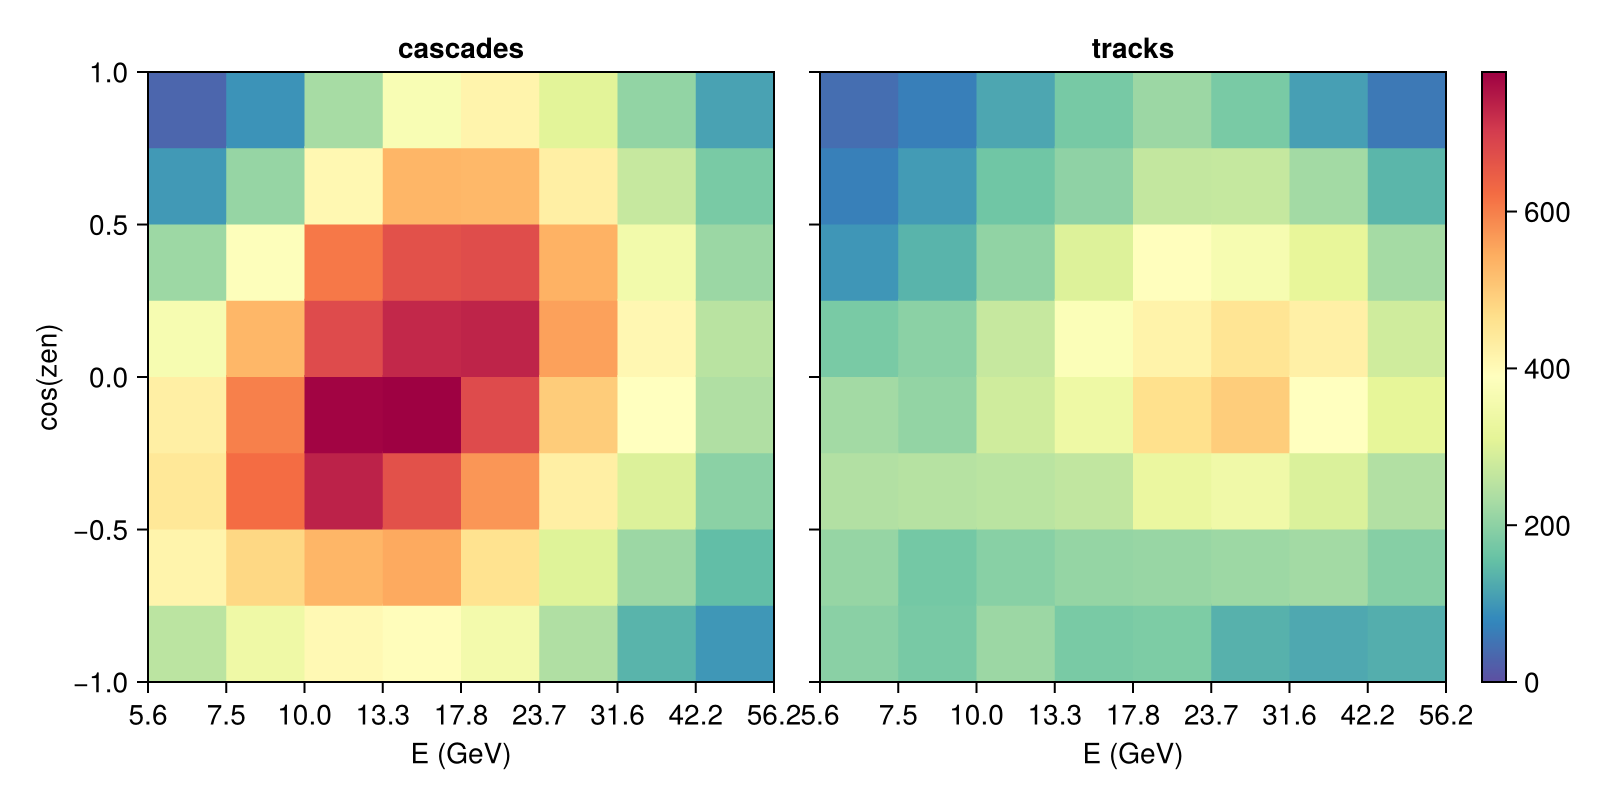

In [79]:
plotmap(observed)

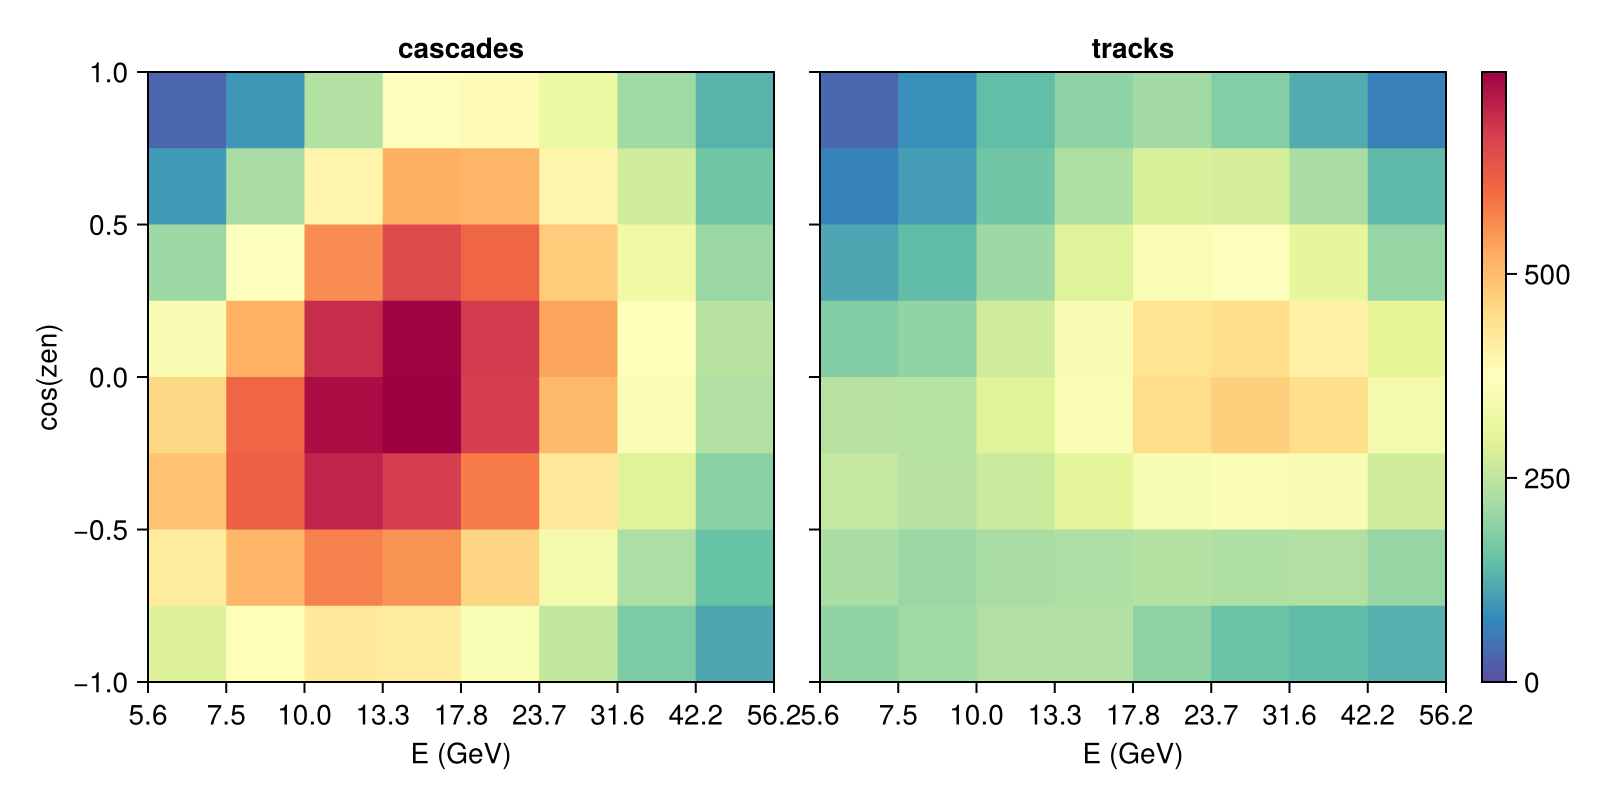

In [80]:
plotmap(expected)

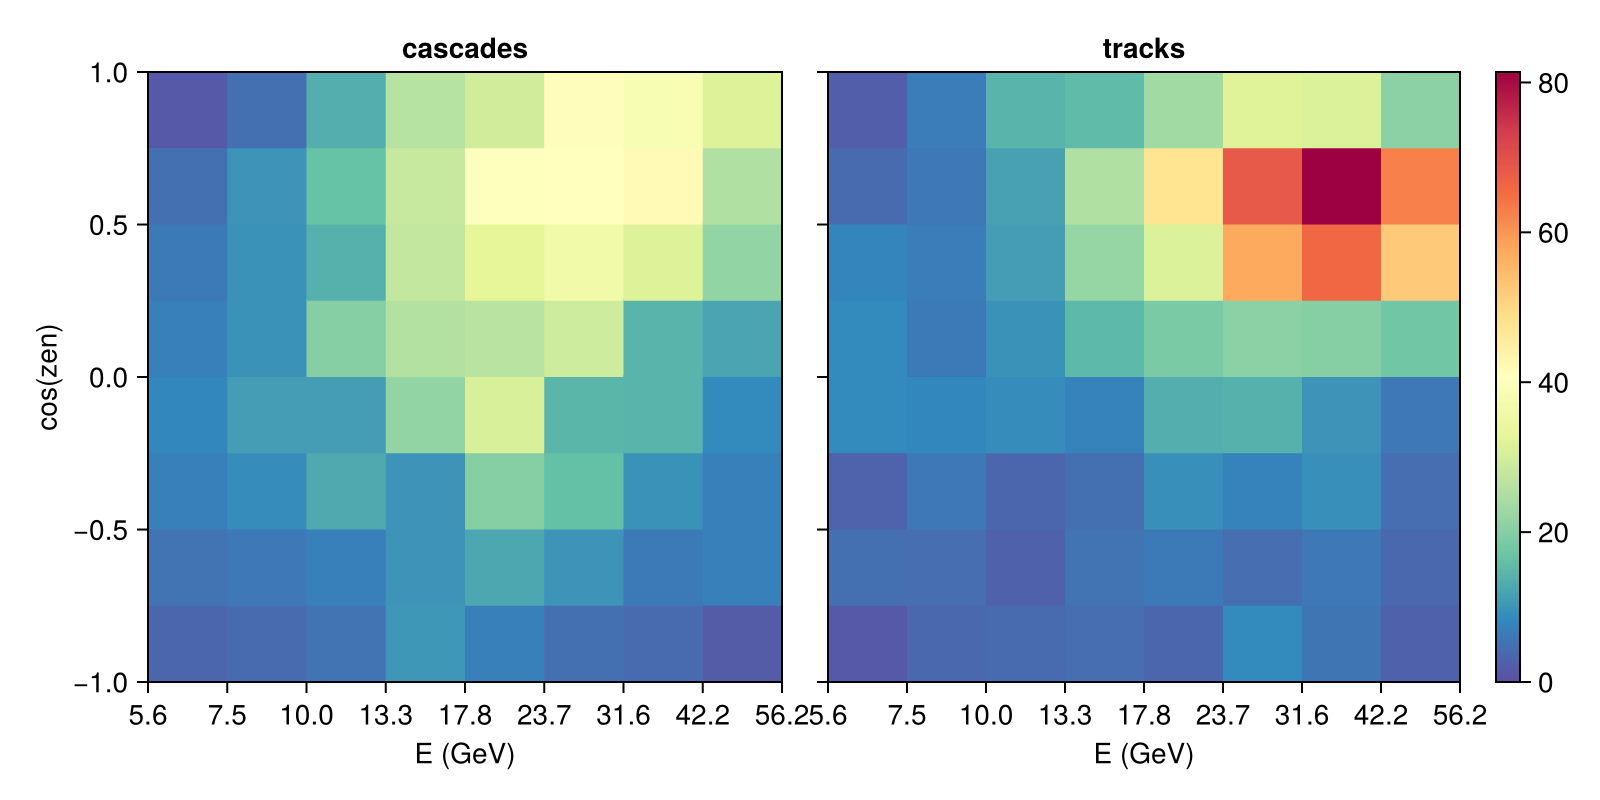

In [81]:
plotmap(muons["count"])

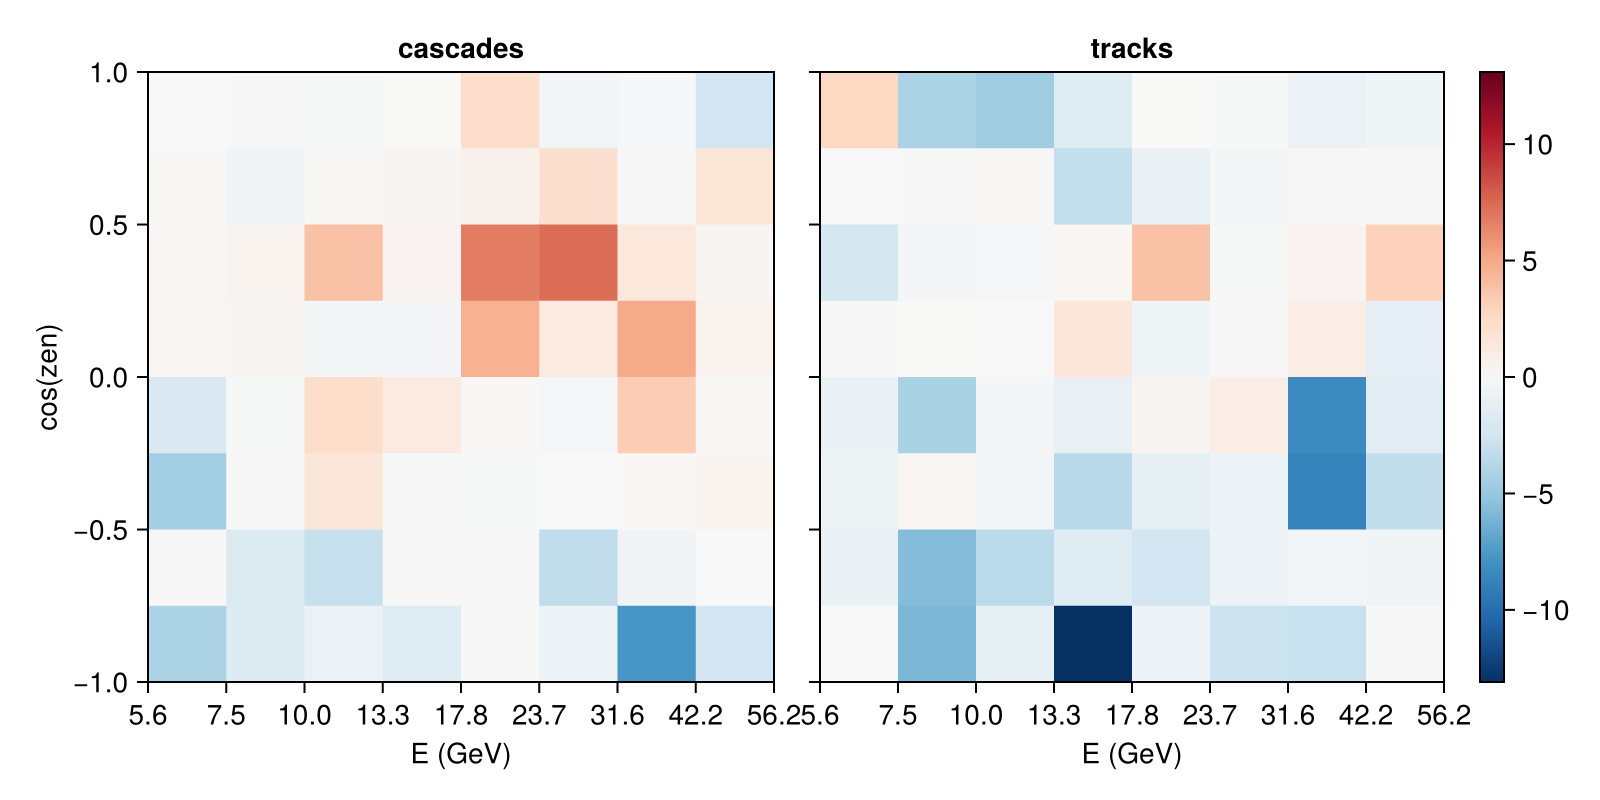

In [86]:
fig = plotmap(sign.(observed .- expected) .* (observed .- expected).^2 ./ expected, colormap=Reverse(:RdBu), symm=true)

In [204]:
para_d = merge(Newtrinos.osc.standard.params, params_dict)

OrderedDict{Any, Any} with 20 entries:
  :θ₁₂                      => 0.587252
  :θ₁₃                      => 0.145426
  :θ₂₃                      => 0.855629
  :δCP                      => 1.0
  :Δm²₂₁                    => 7.53e-5
  :Δm²₃₁                    => 0.0024753
  :deepcore_lifetime        => 2.5
  :deepcore_atm_muon_scale  => 1.0
  :deepcore_ice_absorption  => 1.0
  :deepcore_ice_scattering  => 1.0
  :deepcore_opt_eff_overall => 1.0
  :deepcore_opt_eff_lateral => 0.0
  :deepcore_opt_eff_headon  => 0.0
  :nc_norm                  => 1.0
  :nutau_cc_norm            => 1.0
  :atm_flux_nunubar_ratio   => 1.0
  :atm_flux_nueumu_ratio    => 1.0
  :atm_flux_spectral_index  => 0.0
  :Barr_uphor_ratio         => 0.0
  :Barr_nu_nubar_ratio      => 0.0

In [205]:
prio_d = merge(Newtrinos.osc.standard.priors, priors)

OrderedDict{Any, Any} with 20 entries:
  :θ₁₂                      => Uniform{Float64}(a=0.420534, b=0.785398)
  :θ₁₃                      => Uniform{Float64}(a=0.1, b=0.2)
  :θ₂₃                      => Uniform{Float64}(a=0.523599, b=1.0472)
  :δCP                      => Uniform{Float64}(a=0.0, b=6.28319)
  :Δm²₂₁                    => Uniform{Float64}(a=6.5e-5, b=9.0e-5)
  :Δm²₃₁                    => Uniform{Float64}(a=0.002, b=0.003)
  :deepcore_lifetime        => Uniform{Float64}(a=2.0, b=4.0)
  :deepcore_atm_muon_scale  => Uniform{Float64}(a=0.0, b=2.0)
  :deepcore_ice_absorption  => Truncated(Normal{Float64}(μ=1.0, σ=0.1); lower=0…
  :deepcore_ice_scattering  => Truncated(Normal{Float64}(μ=1.0, σ=0.1); lower=0…
  :deepcore_opt_eff_overall => Truncated(Normal{Float64}(μ=1.0, σ=0.1); lower=0…
  :deepcore_opt_eff_lateral => Truncated(Normal{Float64}(μ=0.0, σ=1.0); lower=-…
  :deepcore_opt_eff_headon  => Uniform{Float64}(a=-5.0, b=2.0)
  :nc_norm                  => Truncated(Norma

In [674]:
prio_d = copy(para_d)

OrderedDict{Any, Any} with 21 entries:
  :deepcore_lifetime        => 2.5
  :deepcore_atm_muon_scale  => 1.0
  :deepcore_ice_absorption  => 1.0
  :deepcore_ice_scattering  => 1.0
  :deepcore_opt_eff_overall => 1.0
  :deepcore_opt_eff_lateral => 0.0
  :deepcore_opt_eff_headon  => 0.0
  :deepcore_aeff_scale      => 1.0
  :nc_norm                  => 1.0
  :nutau_cc_norm            => 1.0
  :atm_flux_nunubar_ratio   => 1.0
  :atm_flux_nueumu_ratio    => 1.0
  :atm_flux_spectral_index  => 0.0
  :Barr_uphor_ratio         => 0.0
  :Barr_nu_nubar_ratio      => 0.0
  :θ₁₂                      => 0.587252
  :θ₁₃                      => 0.145426
  :θ₂₃                      => 0.855629
  :δCP                      => 1.0
  :Δm²₂₁                    => 7.53e-5
  :Δm²₃₁                    => 0.0024753

In [675]:
collect(keys(prio_d))

21-element Vector{Any}:
 :deepcore_lifetime
 :deepcore_atm_muon_scale
 :deepcore_ice_absorption
 :deepcore_ice_scattering
 :deepcore_opt_eff_overall
 :deepcore_opt_eff_lateral
 :deepcore_opt_eff_headon
 :deepcore_aeff_scale
 :nc_norm
 :nutau_cc_norm
 :atm_flux_nunubar_ratio
 :atm_flux_nueumu_ratio
 :atm_flux_spectral_index
 :Barr_uphor_ratio
 :Barr_nu_nubar_ratio
 :θ₁₂
 :θ₁₃
 :θ₂₃
 :δCP
 :Δm²₂₁
 :Δm²₃₁

In [856]:
prio_d[:θ₂₃] = Newtrinos.osc.standard.priors[:θ₂₃]
prio_d[:Δm²₃₁] = Uniform(0.0015, 0.0035)

Uniform{Float64}(a=0.0015, b=0.0035)

In [202]:
vars_to_scan = (θ₂₃ = 10, Δm²₃₁=10)

(θ₂₃ = 10, Δm²₃₁ = 10)

In [206]:
@time result = Newtrinos.profile(l, prio_d, vars_to_scan, para_d);

[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0x04fb6b97fe844991, 0x0fd89fcd94922718, 0x489722936e70b179, 0x551fe144aa3d49ff, 0xf2cfe3e2a56ae81c, 0xb1031c1ec50f7427, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())
[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0xa6bd3c90734f6ecb, 0x04e4e0ba22137cb4, 0x7ac39a6d1a065cc8, 0x98d6449c373f1564, 0x9635d68438e56500, 0x546982b330fad32f, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())
[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0xa86e11182b9af7f3, 0x8e82e8a7aa456b99, 0xf0f8c43e6713d183, 0xe9ee72518b3e5c5d, 0xa8ec2f3ca90629f7, 0x1d17a4e2c9e03253, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), Heterog

14671.197369 seconds (353.55 M allocations: 98.502 TiB, 50.72% gc time, 24 lock conflicts, 0.55% compilation time)


In [98]:
result

LoadError: UndefVarError: `result` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [852]:
#@time result = Newtrinos.scan(l, prio_d, vars_to_scan, para_d, gradient_map=true);

215.618730 seconds (2.49 M allocations: 1.548 TiB, 46.77% gc time)


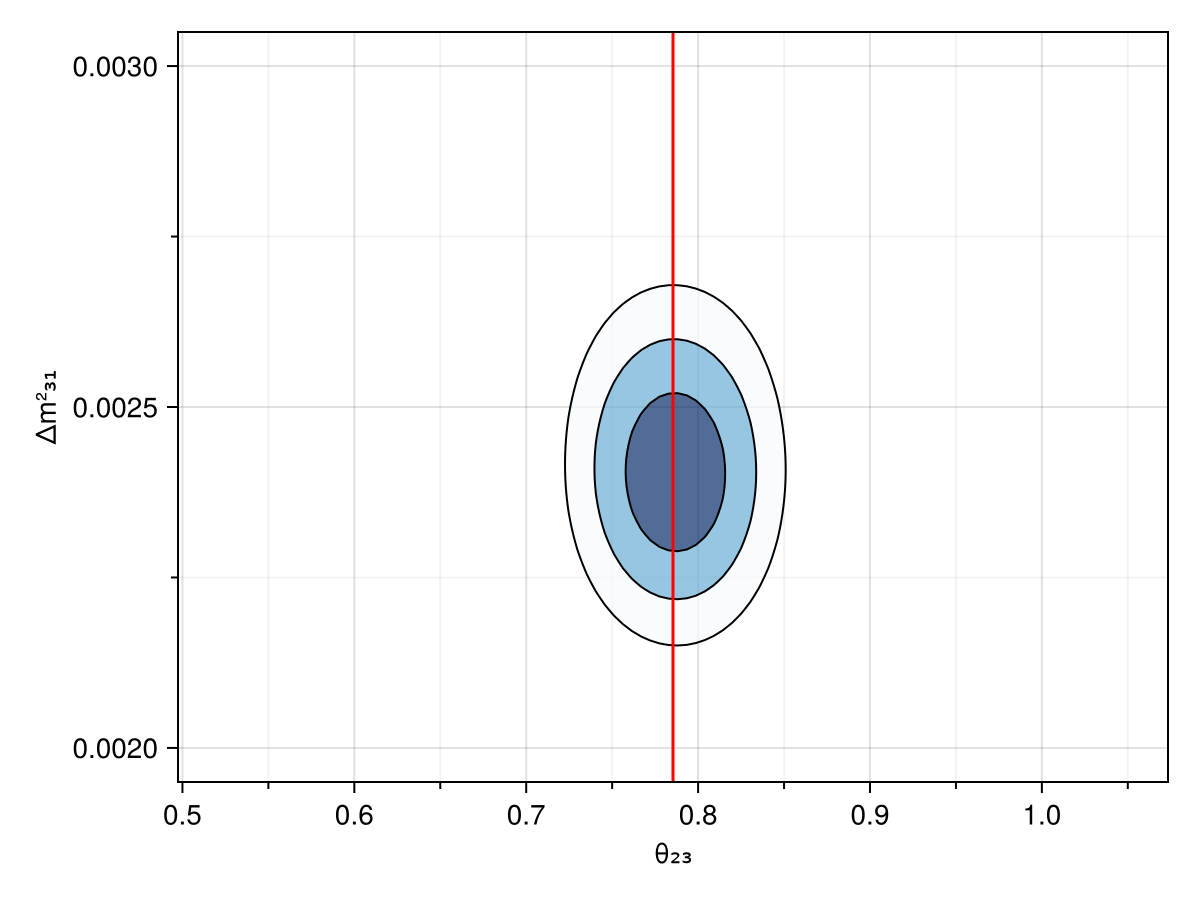

In [330]:
plot(result)
vlines!(pi/4, color=:red)
current_figure()

In [470]:
Newtrinos.bestfit(result)

(Barr_nu_nubar_ratio = 0.0, deepcore_opt_eff_lateral = 0.0, deepcore_opt_eff_overall = 1.0, atm_flux_spectral_index = 0.0, deepcore_ice_scattering = 1.0, deepcore_atm_muon_scale = 1.0, δCP = 1.0, θ₁₂ = 0.5872523687443223, deepcore_opt_eff_headon = 0.0, nc_norm = 1.0, atm_flux_nueumu_ratio = 1.0, Δm²₂₁ = 7.53e-5, deepcore_lifetime = 2.5, deepcore_aeff_scale = 1.0, nutau_cc_norm = 1.0, θ₁₃ = 0.1454258194533693, atm_flux_nunubar_ratio = 1.0, deepcore_ice_absorption = 1.0, Barr_uphor_ratio = 0.0, deepcore_atm_muon_scale_grad = -0.9221746200909617, deepcore_ice_absorption_grad = 31.149349115145316, δCP_grad = 0.6799845562466212, θ₁₂_grad = -0.15358428842968483, deepcore_opt_eff_lateral_grad = 40.07721121444658, nc_norm_grad = -24.328323112638287, deepcore_opt_eff_overall_grad = -247.31980438773766, θ₂₃_grad = -75.84540157286325, atm_flux_nueumu_ratio_grad = 27.116155565236017, Δm²₂₁_grad = 14377.960974177335, atm_flux_nunubar_ratio_grad = -44.63111844259988, θ₁₃_grad = -111.14150528965797, 

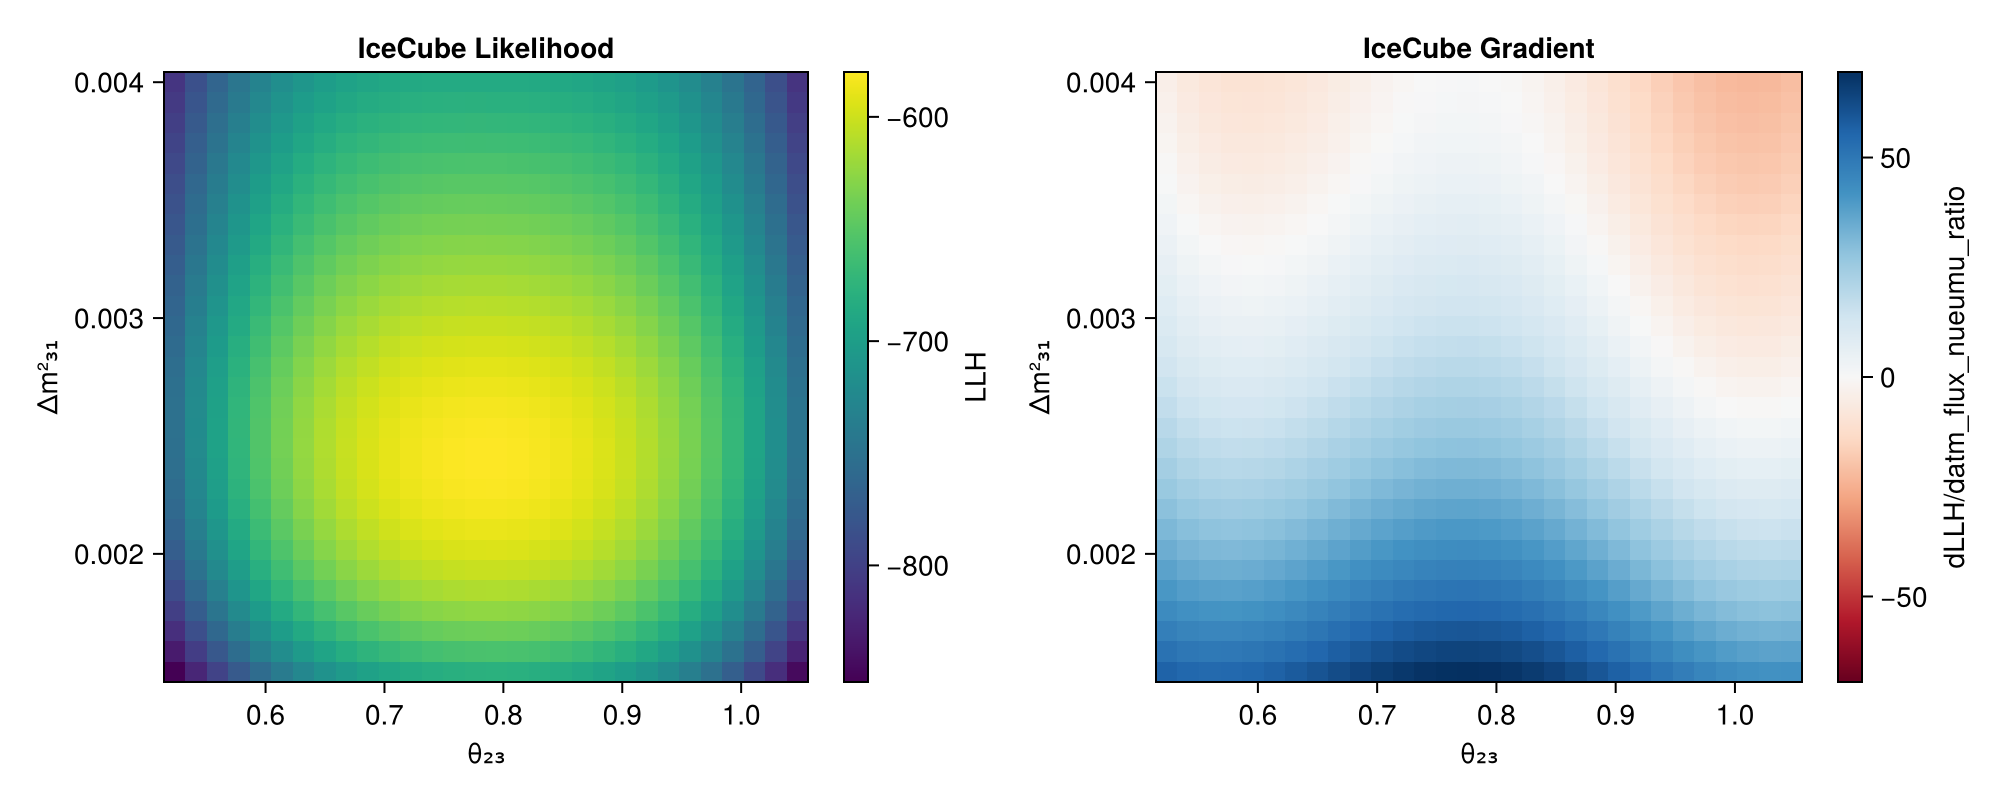

In [855]:
fig = Figure(size=(1000,400))
ax = Axis(fig[1,1], xlabel=String(keys(result.axes)[1]), ylabel=String(keys(result.axes)[2]), title="IceCube Likelihood")
hm = heatmap!(ax, result.axes[1], result.axes[2], result.values.llh)

Colorbar(fig[1,2], hm, label="LLH")
ax = Axis(fig[1,3], xlabel=String(keys(result.axes)[1]), ylabel=String(keys(result.axes)[2]), title="IceCube Gradient")
key = :atm_flux_nueumu_ratio 
h = result.values[Symbol(key, "_grad")]
colorrange = (-maximum(abs.(h)), maximum(abs.(h)))
hm = heatmap!(ax, result.axes[1], result.axes[2], h, colormap=:RdBu, colorrange=colorrange)
Colorbar(fig[1,4], hm, label="dLLH/d$(key)")
save("AD_test_IceCube.png", fig)
fig

In [205]:
using ArraysOfArrays

In [208]:
VA = VectorOfArrays{Number, 2}()

0-element VectorOfArrays{Number, 2, 1, Vector{Number}, Vector{Int64}, Vector{Tuple{Int64}}}

In [209]:
push!(VA, rand(2,2))

1-element VectorOfArrays{Number, 2, 1, Vector{Number}, Vector{Int64}, Vector{Tuple{Int64}}}:
 Number[0.5826789017939696 0.8230998463892565; 0.8400532131726357 0.2782831872814545]

In [210]:
push!(VA, rand(4,2))

2-element VectorOfArrays{Number, 2, 1, Vector{Number}, Vector{Int64}, Vector{Tuple{Int64}}}:
 Number[0.5826789017939696 0.8230998463892565; 0.8400532131726357 0.2782831872814545]
 Number[0.8680089887545899 0.9230963409582124; 0.7894882359744353 0.8552412422869538; 0.8577004102484459 0.9270983863027138; 0.7352722831665024 0.8374551405953808]

In [211]:
VA

2-element VectorOfArrays{Number, 2, 1, Vector{Number}, Vector{Int64}, Vector{Tuple{Int64}}}:
 Number[0.5826789017939696 0.8230998463892565; 0.8400532131726357 0.2782831872814545]
 Number[0.8680089887545899 0.9230963409582124; 0.7894882359744353 0.8552412422869538; 0.8577004102484459 0.9270983863027138; 0.7352722831665024 0.8374551405953808]

In [212]:
flatview(VA)

12-element Vector{Number}:
 0.5826789017939696
 0.8400532131726357
 0.8230998463892565
 0.2782831872814545
 0.8680089887545899
 0.7894882359744353
 0.8577004102484459
 0.7352722831665024
 0.9230963409582124
 0.8552412422869538
 0.9270983863027138
 0.8374551405953808

In [214]:
ArraysOfArrays.element_ptr(VA)

3-element Vector{Int64}:
  1
  5
 13

In [222]:
innermap(x -> (x,x), VA)

2-element VectorOfArrays{Tuple{Float64, Float64}, 2, 1, Vector{Tuple{Float64, Float64}}, Vector{Int64}, Vector{Tuple{Int64}}}:
 [(0.5826789017939696, 0.5826789017939696) (0.8230998463892565, 0.8230998463892565); (0.8400532131726357, 0.8400532131726357) (0.2782831872814545, 0.2782831872814545)]
 [(0.8680089887545899, 0.8680089887545899) (0.9230963409582124, 0.9230963409582124); (0.7894882359744353, 0.7894882359744353) (0.8552412422869538, 0.8552412422869538); (0.8577004102484459, 0.8577004102484459) (0.9270983863027138, 0.9270983863027138); (0.7352722831665024, 0.7352722831665024) (0.8374551405953808, 0.8374551405953808)]

In [221]:
VA[1]

2×2 reshape(view(::Vector{Number}, 1:4), 2, 2) with eltype Number:
 0.582679  0.8231
 0.840053  0.278283